In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "diabetes2.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "kandij/diabetes-dataset",
  file_path,
)
df.head()

<ipython-input-5-ef3444692403>:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=1)

model= LogisticRegression()
hist = model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


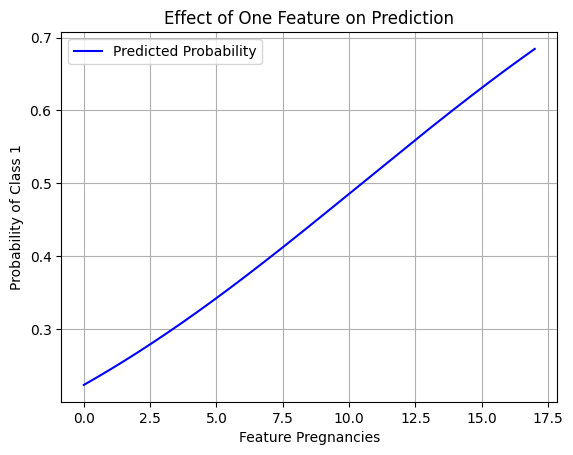

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Choose feature index
feature_index = 0

# Get numpy version of DataFrame for mean calculation
x_mean = x.mean().values  # Works with pandas
x_values = np.linspace(x.iloc[:, feature_index].min(), x.iloc[:, feature_index].max(), 300).reshape(-1, 1)

# Create repeated input where all features are mean except the chosen one
X_plot = np.tile(x_mean, (300, 1))
X_plot[:, feature_index] = x_values.ravel()

# Predict
y_proba = model.predict_proba(X_plot)[:, 1]

# Plot
plt.plot(x_values, y_proba, color='blue', label='Predicted Probability')
plt.xlabel(f'Feature {x.columns[feature_index]}')
plt.ylabel('Probability of Class 1')
plt.title('Effect of One Feature on Prediction')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
print(f"{len(x_test)}\n{len(y_test)}\n\n{len(x_train)}\n{len(y_train)}")

538
538

230
230


In [ ]:
y_pred=model.predict(x_test)
model.score(x_test,y_test)*100

77.5092936802974

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = confusion_matrix(y_test,y_pred)

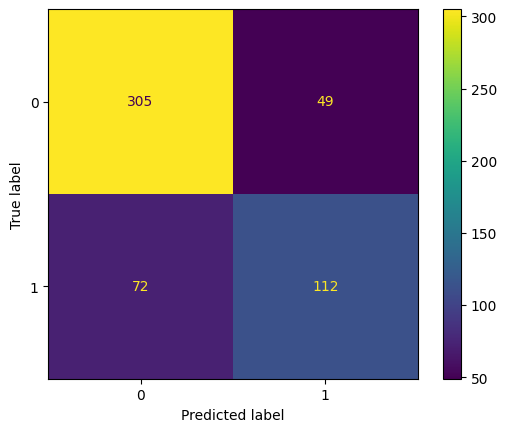

In [ ]:
disp = ConfusionMatrixDisplay(matrix)

disp.plot()

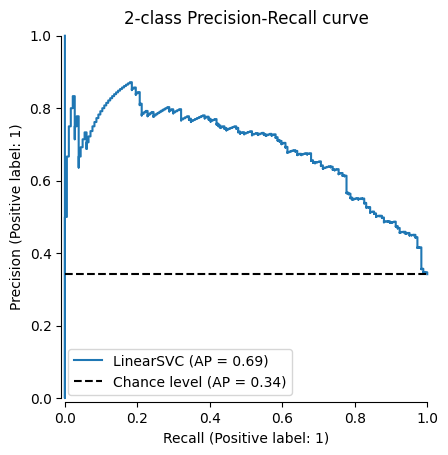

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    model, x_test, y_test, name="LinearSVC", plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
hist = model.fit(x_train,y_train)
hist

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([ 4.91117019e-01,  3.15694212e-01,  1.73490941e-01, -3.13523884e-02,
        3.10595317e-01,  2.74143656e-01,  3.96017743e-01,  1.25402273e-01,
        1.50502196e-01,  2.69042764e-01,  3.75596106e-01,  9.21589062e-02,
        1.21626787e+00,  7.31150624e-01, -8.87108555e-03,  6.17128653e-01,
        3.03456513e-01,  3.23131271e-01,  2.31719956e-01,  2.86565609e-01,
        5.08993576e-01,  2.40562235e-01,  1.08486441e+00,  2.94693944e-01,
        6.95235973e-02,  3.91199185e-01,  2.51845869e-01,  6.57866302e-01,
        1.10756132e-01,  5.29898888e-01,  4.39266687e-01,  4.89671857e-01,
        4.24447147e-02,  7.52123662e-01,  1.65818728e-01,  5.91189448e-01,
        1.31899014e-01,  2.82249578e-01,  1.25496731e-01,  5.53257947e-01,
        3.06360991e-01,  1.24581610e-01, -4.92917656e-02,  3.40061930e-01,
        8.97041230e-02, -1.27167863e-01,  8.21140323e-01,  6.48146969e-01,
        2.17762973e-01,  1.88157820e-01, -2.40798407e-01,  3.04744709e-01,
        7.97035128e-01,  

In [ ]:
for i in range(len(y_pred)):
  if y_pred[i]>=0.5: y_pred[i]=1
  else: y_pred[i]=0

In [ ]:
y_pred = y_pred.astype('int8')